In [1]:
#Install the "astropy" package
!pip install astropy

# Importing Astropy
Let us import the cosmology module from `astropy`!

The LamdaCDM documention can be found on https://docs.astropy.org/en/stable/api/astropy.cosmology.LambdaCDM.html

In [2]:
#Import the cosmology module
from astropy.cosmology import LambdaCDM

In [3]:
#Check the age of the Universe
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
cosmo.age(0)
#age(redshift-z) z=0 at present

<Quantity 13.46698395 Gyr>

# Plotting $a(t)$
The determining the scale factor can be easily done using `astropy`'s `scale_factor` function.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#prepare a numpy array of redshift from 0.001 to 10000 in log
z_red = 10**np.array([-3 + i*7/100 for i in range(101)])

#compute the scale factor and age
a_scale = cosmo.scale_factor(z_red)
t_age = cosmo.age(z_red)

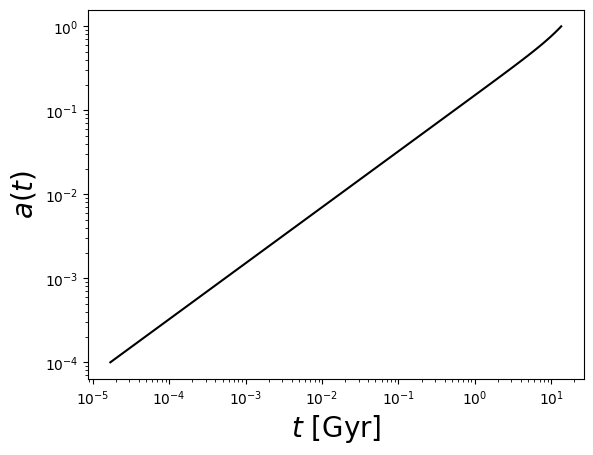

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$a(t)$', fontsize=20)

plt.loglog(t_age, a_scale, 'k-')
plt.show()

Let's check out the matter-dominant era and compare it with the EdS solution, recall that the EdS solution is given by:
$$
a_{\rm EdS}(t) \propto t^{2/3}.
$$

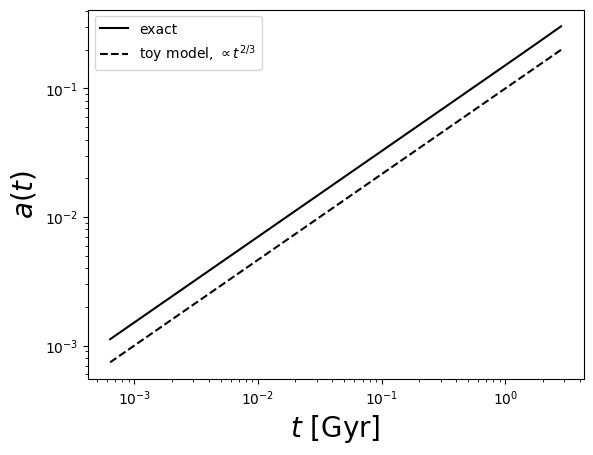

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$a(t)$', fontsize=20)

#matter dominant era 2 < z < 1000
mask_MD = (z_red>2) & (z_red<1000)
plt.loglog(t_age[mask_MD], a_scale[mask_MD], 'k-', label='exact')
plt.loglog(t_age[mask_MD],0.1*t_age[mask_MD]**(2/3), 'k--', label=r'toy model, $\propto t^{2/3}$')
ax.legend()
plt.show()

# Problem 2.6: Cosmological-constant dominant era

Normalize the analytic curve at $z=0$.

Recall that the solution to the cosmological constant-only universe is given by:
$$
a_\Lambda(t) \propto e^{H_0\Omega_\Lambda^{1/2}t}.
$$

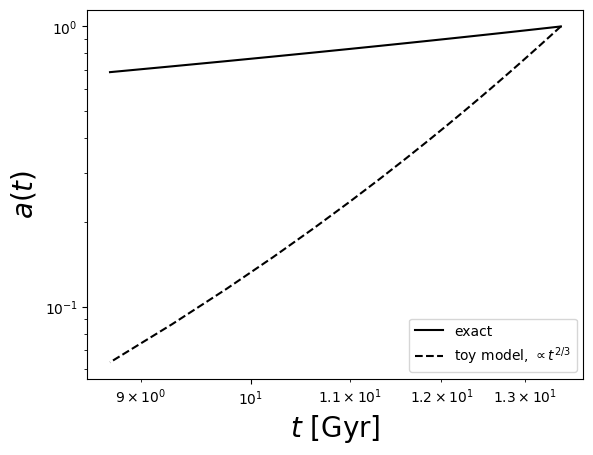

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$a(t)$', fontsize=20)

#Cosmological-constant dominant era z < 0.5
H0 = cosmo.H0.value
OmL = H0 = cosmo.Ode0
norm = 1/np.exp(H0*OmL**(1/2)*t_age[0].value)

mask_L = z_red<0.5
plt.loglog(t_age[mask_L], a_scale[mask_L], 'k-', label='exact')
plt.loglog(t_age[mask_L],norm*np.exp(H0*OmL**(1/2)*t_age[mask_L].value), 'k--', label=r'toy model, $\propto t^{2/3}$')

ax.legend()
plt.show()